In [55]:
import function as f
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

def group_folders_by_truck_numbers(_directory_path):
    folder_groups = {}
    
    for folder_name in os.listdir(_directory_path):
        extension = os.path.splitext(folder_name)[-1]
        
        # .csv 파일만 가져오기\n",
        if extension != '.meta':
            folder_path = os.path.join(_directory_path, folder_name)
            # list to tuple
            key = tuple(map(int, re.findall(r'\d+', folder_name)[:2]))

            congestion_df = f.get_congestion_ratio_df(folder_path)
            if key in folder_groups:
                folder_groups[key].append(congestion_df)
            else:
                folder_groups[key] = [congestion_df]
    return folder_groups


def subplot_congestion_avg(_directory_path, _x_label, _y_label, _title, row_num, col_num, fig_size):
    f, axes = plt.subplots(row_num, col_num)
    # 격자 크기 설정
    f.set_size_inches(fig_size)
    
    # 격자 여백 설정
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
    row_index = 0
    col_index = 0
    
    grouped_data = group_folders_by_truck_numbers(_directory_path)
    
    for i in range(len(grouped_data)):
        # get first key
        key = list(grouped_data.keys())[i]
        # 행별로 각 데이터프레임의 Congestion_ratio 열의 합계를 초기화\n",
        sum_congestion = pd.Series(0.0, index=grouped_data[key][0].index)

        # 데이터프레임 리스트를 순회하면서 행별로 Congestion_ratio 열을 합산
        for df in grouped_data[key]:
            sum_congestion += df['Congestion_ratio']
        
        # 데이터프레임의 개수로 나누어 각 행별 평균을 계산\n",
        average_congestion = sum_congestion / len(grouped_data[key])
       
        # 결과를 새로운 데이터프레임으로 생성\n",
        result_df = pd.DataFrame({'alpha_1' : df['alpha_1'].values, 'alpha_2' : df['alpha_2'].values, 'alpha_3' : df['alpha_3'].values, 'Congestion_ratio_mean': average_congestion})
        print('key : ', key, ', col_index : ', col_index, ' , row_index : ', row_index)
        
        x_value_1 = result_df['alpha_1']
        y_value_1 = result_df['Congestion_ratio_mean']
        _title_name = _title + ' (prev_' + str(key[0]) + '_now_' + str(key[1]) +')'
        
        if row_num == 1:
            plt.subplot(1, col_num, col_index + 1)
            plt.plot(x_value_1, y_value_1 , marker='o', linestyle='-', color = 'steelblue')

            plt.xlabel(_x_label, fontsize=9, ha='center')
            plt.ylabel(_y_label, fontsize=9)
            # x축 10 단위로 표시
            # plt.xticks(range(x_value_1.min(), x_value_1.max() + 10, 10))
            plt.title(_title_name, fontsize=9, ha='center')
            plt.axhline(y=y_value_1.iloc[0], color='gray', linestyle='--')
                
        else:
            # x축 10 단위로 표시
            # axes[row_index, col_index].set_xticks(range(x_value_1.min(), x_value_1.max() + 10, 10))
            axes[row_index, col_index].plot(x_value_1, y_value_1 , marker='o', linestyle='-', color = 'steelblue')
            axes[row_index, col_index].axhline(y=y_value_1.iloc[0], color='gray', linestyle='--')
            
            axes[row_index, col_index].set_xlabel(_x_label, fontsize=9, ha='center')
            axes[row_index, col_index].set_ylabel(_y_label, fontsize=9)
            axes[row_index, col_index].set_title(_title_name, fontsize=9, ha='center')

        col_index += 1
        if(col_index == col_num):
            col_index = 0
            row_index += 1
            
    plt.show()

key :  (25, 25) , col_index :  0  , row_index :  0
key :  (25, 30) , col_index :  1  , row_index :  0
key :  (30, 30) , col_index :  2  , row_index :  0
key :  (30, 35) , col_index :  3  , row_index :  0


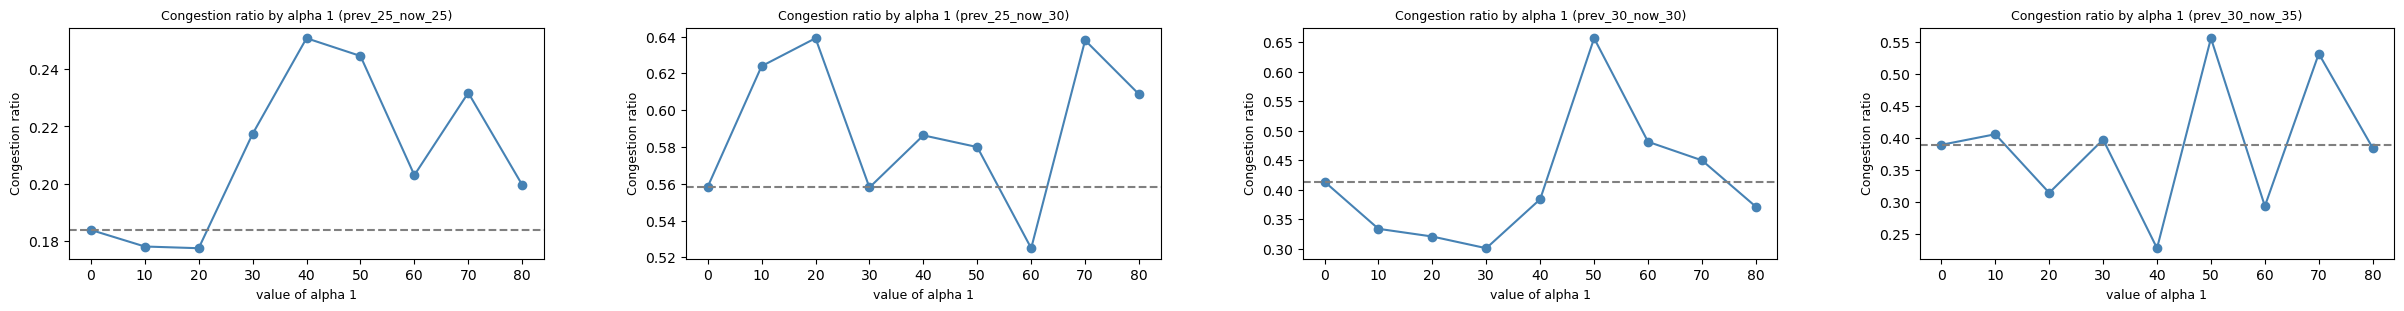

In [59]:
directory_path = '../Simulation/Assets/Results/Congestion'
x_label = 'value of alpha 1'
y_label = 'Congestion ratio'
title = 'Congestion ratio by alpha 1'
row_num = 1
col_num = 4
fig_size = (30,3)

subplot_congestion_avg(directory_path, x_label, y_label, title, row_num, col_num, fig_size)

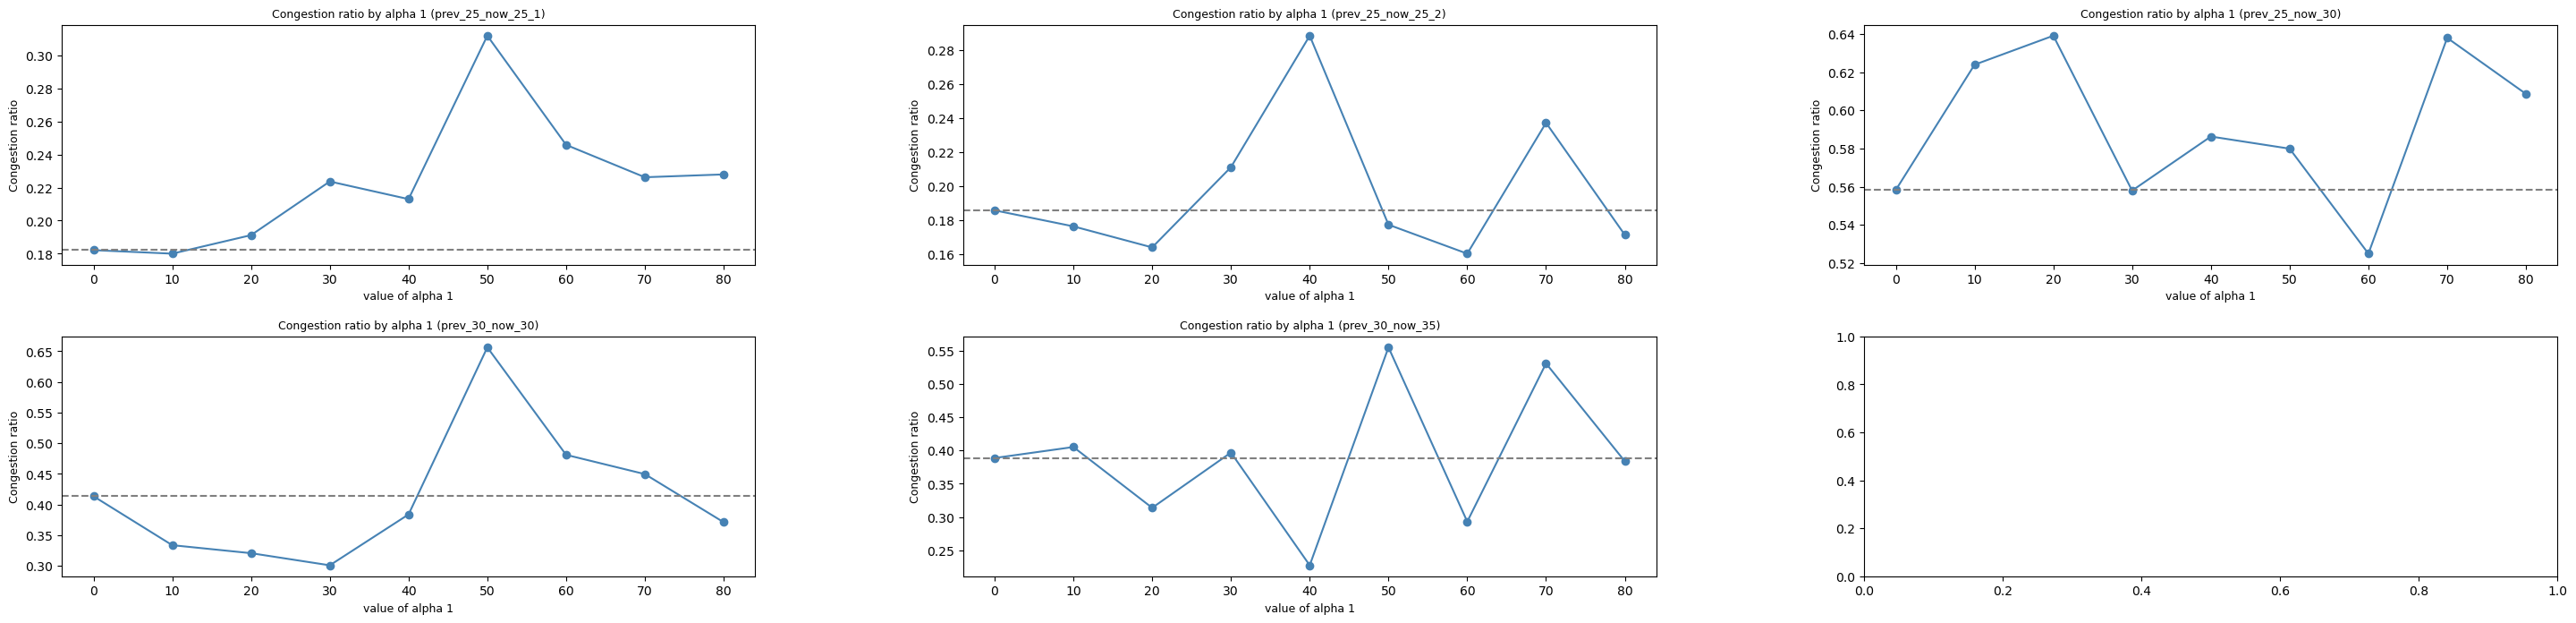

In [60]:
f.Create_subplot_congestion(directory_path, x_label, y_label, title, 2, 3, (36, 8))